In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier



In [2]:
# Load all sheets from the Excel file into a dictionary of DataFrames
excel_file = pd.ExcelFile('feature_ranking.xlsx')
sheet_names = excel_file.sheet_names

In [3]:
# Load the datasets for training and testing
train_data = pd.read_csv("../../data/BinaryClassify/train_nsl_kdd_binary_encoded.csv")
test_data = pd.read_csv("../../data/BinaryClassify/test_nsl_kdd_binary_encoded.csv")

In [4]:
# Features and labels for training
X_train = train_data.drop("binaryoutcome", axis=1)
y_train = train_data["binaryoutcome"]

# Features and labels for testing
X_test = test_data.drop("binaryoutcome", axis=1)
y_test = test_data["binaryoutcome"]

Iteration 1: chi_2 - Num Features: 1, Test Accuracy: 0.4308
Iteration 2: chi_2 - Num Features: 2, Test Accuracy: 0.4308
Iteration 3: chi_2 - Num Features: 3, Test Accuracy: 0.4308
Iteration 4: chi_2 - Num Features: 4, Test Accuracy: 0.4311
Iteration 5: chi_2 - Num Features: 5, Test Accuracy: 0.4313
Iteration 6: chi_2 - Num Features: 6, Test Accuracy: 0.4521
Iteration 7: chi_2 - Num Features: 7, Test Accuracy: 0.4524
Iteration 8: chi_2 - Num Features: 8, Test Accuracy: 0.4526
Iteration 9: chi_2 - Num Features: 9, Test Accuracy: 0.4526
Iteration 10: chi_2 - Num Features: 10, Test Accuracy: 0.4484
Iteration 11: chi_2 - Num Features: 11, Test Accuracy: 0.4483
Iteration 12: chi_2 - Num Features: 12, Test Accuracy: 0.4486
Iteration 13: chi_2 - Num Features: 13, Test Accuracy: 0.4623
Iteration 14: chi_2 - Num Features: 14, Test Accuracy: 0.4703
Iteration 15: chi_2 - Num Features: 15, Test Accuracy: 0.4698
Iteration 16: chi_2 - Num Features: 16, Test Accuracy: 0.5182
Iteration 17: chi_2 - Num 

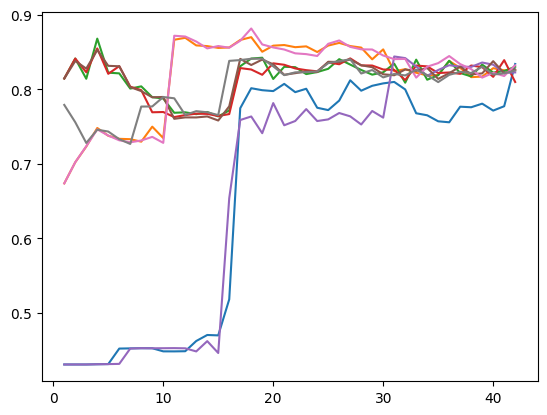

In [11]:
# Iterate through each sheet
for sheet_name in sheet_names:
    # Read the sheet into a DataFrame
    sheet_df = pd.read_excel(excel_file, sheet_name)

    # Rename columns if needed (replace 'Feature' and 'Combined Score' with actual column names)
    sheet_df = sheet_df.rename(columns={'ColumnA': 'Feature', 'ColumnB': 'Combined Score'})

    # Initialize lists to store accuracy and number of features
    accuracy_scores = []
    num_features = []

    # Extract top i features based on the sorted feature list
    for i in range(1, sheet_df.shape[0] + 1):
        x_train_filtered = X_train[sheet_df['Feature'][:i]]
        x_test_filtered = X_test[sheet_df['Feature'][:i]]

        # Ensure at least one feature is selected
        if x_train_filtered.shape[1] > 0:
            # Train the model on the filtered training data
            clf = RandomForestClassifier()
            clf.fit(x_train_filtered, y_train)

            # Test the model on the filtered test data
            accuracy = clf.score(x_test_filtered, y_test)
            accuracy_scores.append(accuracy)
            num_features.append(i)

            print(f"Iteration {i}: {sheet_name} - Num Features: {i}, Test Accuracy: {accuracy:.4f}")

    # Plot the line for each filter method
    plt.plot(num_features, accuracy_scores, label=sheet_name)

## Plotting the graph with all filters

In [5]:
feature_accuracy_sheet = pd.ExcelFile('feature_acccuracy.xlsx')

In [6]:
acc_sheet_names = feature_accuracy_sheet.sheet_names

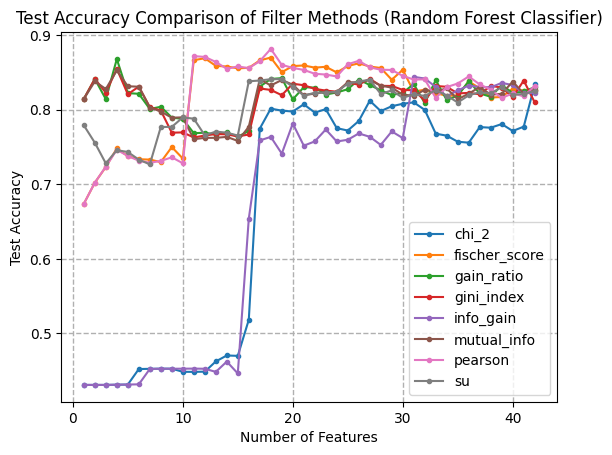

In [29]:
for sheet_name in acc_sheet_names:
    sheet_df = pd.read_excel(feature_accuracy_sheet, sheet_name)
    
    plt.plot(sheet_df['Num of features'], sheet_df['Accuracy'], label=sheet_name,marker='.')
plt.xlabel("Number of Features")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Comparison of Filter Methods (Random Forest Classifier)")
plt.legend()  # Add legend for better visualization
# Add grid with 1 unit spacing
plt.grid(True, which='both', linestyle='--', linewidth=1)

plt.show()

## Plotting with Logistic regression

In [9]:
from sklearn.linear_model import LogisticRegression

In [14]:
# Iterate through each sheet
for sheet_name in sheet_names:
    # Read the sheet into a DataFrame
    sheet_df = pd.read_excel(excel_file, sheet_name)

    # Rename columns if needed (replace 'Feature' and 'Combined Score' with actual column names)
    sheet_df = sheet_df.rename(columns={'ColumnA': 'Feature', 'ColumnB': 'Combined Score'})

    # Initialize lists to store accuracy and number of features
    accuracy_scores = []
    num_features = []

    # Extract top i features based on the sorted feature list
    for i in range(1, sheet_df.shape[0] + 1):
        x_train_filtered = X_train[sheet_df['Feature'][:i]]
        x_test_filtered = X_test[sheet_df['Feature'][:i]]

        # Ensure at least one feature is selected
        if x_train_filtered.shape[1] > 0:
            # Train the model on the filtered training data
            clf = LogisticRegression(solver='saga', max_iter=2000, tol=1e-4, penalty='l1')
            clf.fit(x_train_filtered, y_train)

            # Test the model on the filtered test data
            accuracy = clf.score(x_test_filtered, y_test)
            accuracy_scores.append(accuracy)
            num_features.append(i)

            print(f"Iteration {i}: {sheet_name} - Num Features: {i}, Test Accuracy: {accuracy:.4f}")

    # Plot the line for each filter method
    plt.plot(num_features, accuracy_scores, label=sheet_name)
    
plt.xlabel("Number of Features")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Comparison of Filter Methods (Logistic Regression)")
plt.legend()  # Add legend for better visualization
plt.show()


Iteration 1: chi_2 - Num Features: 1, Test Accuracy: 0.4308
Iteration 2: chi_2 - Num Features: 2, Test Accuracy: 0.4308
Iteration 3: chi_2 - Num Features: 3, Test Accuracy: 0.4308
Iteration 4: chi_2 - Num Features: 4, Test Accuracy: 0.4311
Iteration 5: chi_2 - Num Features: 5, Test Accuracy: 0.4311
Iteration 6: chi_2 - Num Features: 6, Test Accuracy: 0.4311
Iteration 7: chi_2 - Num Features: 7, Test Accuracy: 0.4311
Iteration 8: chi_2 - Num Features: 8, Test Accuracy: 0.4311
Iteration 9: chi_2 - Num Features: 9, Test Accuracy: 0.4311
Iteration 10: chi_2 - Num Features: 10, Test Accuracy: 0.4311
Iteration 11: chi_2 - Num Features: 11, Test Accuracy: 0.4311


/Users/aravind/Projects/IntrusionDetection/IntrusionDetection/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration 12: chi_2 - Num Features: 12, Test Accuracy: 0.4308


KeyboardInterrupt: 

## Plotting with KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

Iteration 1: chi_2 - Num Features: 1, Test Accuracy: 0.4308
Iteration 2: chi_2 - Num Features: 2, Test Accuracy: 0.4308
Iteration 3: chi_2 - Num Features: 3, Test Accuracy: 0.4308
Iteration 4: chi_2 - Num Features: 4, Test Accuracy: 0.4311
Iteration 5: chi_2 - Num Features: 5, Test Accuracy: 0.4311
Iteration 6: chi_2 - Num Features: 6, Test Accuracy: 0.4313
Iteration 7: chi_2 - Num Features: 7, Test Accuracy: 0.4316
Iteration 8: chi_2 - Num Features: 8, Test Accuracy: 0.4526
Iteration 9: chi_2 - Num Features: 9, Test Accuracy: 0.4526
Iteration 10: chi_2 - Num Features: 10, Test Accuracy: 0.4526
Iteration 11: chi_2 - Num Features: 11, Test Accuracy: 0.4365
Iteration 12: chi_2 - Num Features: 12, Test Accuracy: 0.4319
Iteration 13: chi_2 - Num Features: 13, Test Accuracy: 0.4864
Iteration 14: chi_2 - Num Features: 14, Test Accuracy: 0.4885
Iteration 15: chi_2 - Num Features: 15, Test Accuracy: 0.4883
Iteration 16: chi_2 - Num Features: 16, Test Accuracy: 0.4929
Iteration 17: chi_2 - Num 

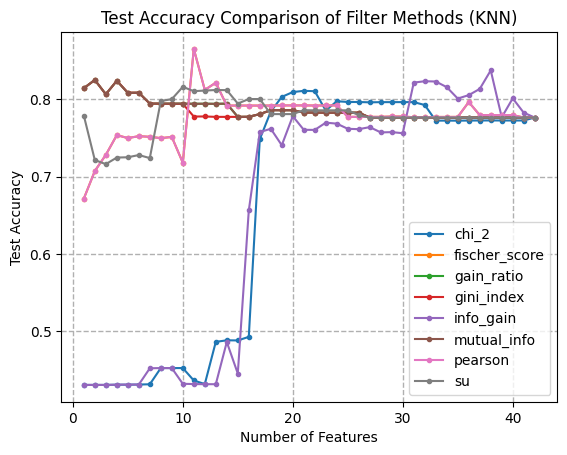

In [35]:
# Iterate through each sheet
for sheet_name in sheet_names:
    # Read the sheet into a DataFrame
    sheet_df = pd.read_excel(excel_file, sheet_name)

    # Rename columns if needed (replace 'Feature' and 'Combined Score' with actual column names)
    sheet_df = sheet_df.rename(columns={'ColumnA': 'Feature', 'ColumnB': 'Combined Score'})

    # Initialize lists to store accuracy and number of features
    accuracy_scores = []
    num_features = []

    # Extract top i features based on the sorted feature list
    for i in range(1, sheet_df.shape[0] + 1):
        x_train_filtered = X_train[sheet_df['Feature'][:i]]
        x_test_filtered = X_test[sheet_df['Feature'][:i]]

        # Ensure at least one feature is selected
        if x_train_filtered.shape[1] > 0:
            # Train the model on the filtered training data
            clf = KNeighborsClassifier(5)
            clf.fit(x_train_filtered, y_train)

            # Test the model on the filtered test data
            accuracy = clf.score(x_test_filtered, y_test)
            accuracy_scores.append(accuracy)
            num_features.append(i)

            print(f"Iteration {i}: {sheet_name} - Num Features: {i}, Test Accuracy: {accuracy:.4f}")

    # Plot the line for each filter method
    plt.plot(num_features, accuracy_scores, label=sheet_name,marker='.')
    
plt.xlabel("Number of Features")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Comparison of Filter Methods (KNN)")
plt.legend()  # Add legend for better visualization
plt.grid(True, which='both', linestyle='--', linewidth=1)
plt.show()


## Decision tree 

In [30]:
from sklearn.tree import DecisionTreeClassifier

Iteration 1: chi_2 - Num Features: 1, Test Accuracy: 0.4308
Iteration 2: chi_2 - Num Features: 2, Test Accuracy: 0.4308
Iteration 3: chi_2 - Num Features: 3, Test Accuracy: 0.4308
Iteration 4: chi_2 - Num Features: 4, Test Accuracy: 0.4311
Iteration 5: chi_2 - Num Features: 5, Test Accuracy: 0.4521
Iteration 6: chi_2 - Num Features: 6, Test Accuracy: 0.4521
Iteration 7: chi_2 - Num Features: 7, Test Accuracy: 0.4524
Iteration 8: chi_2 - Num Features: 8, Test Accuracy: 0.4527
Iteration 9: chi_2 - Num Features: 9, Test Accuracy: 0.4528
Iteration 10: chi_2 - Num Features: 10, Test Accuracy: 0.4484
Iteration 11: chi_2 - Num Features: 11, Test Accuracy: 0.4486
Iteration 12: chi_2 - Num Features: 12, Test Accuracy: 0.4485
Iteration 13: chi_2 - Num Features: 13, Test Accuracy: 0.4626
Iteration 14: chi_2 - Num Features: 14, Test Accuracy: 0.4701
Iteration 15: chi_2 - Num Features: 15, Test Accuracy: 0.4701
Iteration 16: chi_2 - Num Features: 16, Test Accuracy: 0.5178
Iteration 17: chi_2 - Num 

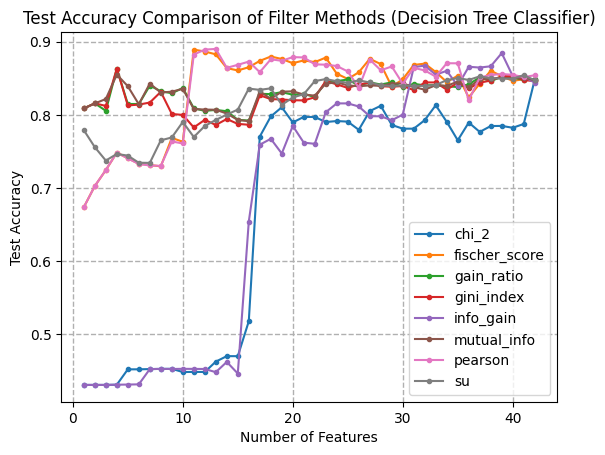

In [33]:
# Iterate through each sheet
for sheet_name in sheet_names:
    # Read the sheet into a DataFrame
    sheet_df = pd.read_excel(excel_file, sheet_name)

    # Rename columns if needed (replace 'Feature' and 'Combined Score' with actual column names)
    sheet_df = sheet_df.rename(columns={'ColumnA': 'Feature', 'ColumnB': 'Combined Score'})

    # Initialize lists to store accuracy and number of features
    accuracy_scores = []
    num_features = []

    # Extract top i features based on the sorted feature list
    for i in range(1, sheet_df.shape[0] + 1):
        x_train_filtered = X_train[sheet_df['Feature'][:i]]
        x_test_filtered = X_test[sheet_df['Feature'][:i]]

        # Ensure at least one feature is selected
        if x_train_filtered.shape[1] > 0:
            # Train the model on the filtered training data
            clf = DecisionTreeClassifier()
            clf.fit(x_train_filtered, y_train)

            # Test the model on the filtered test data
            accuracy = clf.score(x_test_filtered, y_test)
            accuracy_scores.append(accuracy)
            num_features.append(i)

            print(f"Iteration {i}: {sheet_name} - Num Features: {i}, Test Accuracy: {accuracy:.4f}")

    # Plot the line for each filter method
    plt.plot(num_features, accuracy_scores, label=sheet_name,marker='.')
    
plt.xlabel("Number of Features")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Comparison of Filter Methods (Decision Tree Classifier)")
plt.legend()  # Add legend for better visualization
plt.grid(True, which='both', linestyle='--', linewidth=1)
plt.show()
